In [1]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from nltk.corpus import stopwords
import numpy as np
import time
import string
import matplotlib.pyplot as ptr
data=fetch_20newsgroups()

In [2]:
data.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [3]:
def make_word_dict(data):
    d={}
    #will be using stopwords from library nltk
    stopword=set(stopwords.words('english'))
    pun=list(string.punctuation)
    stopword.update(pun)
    for x in data:
        for i in x.split():
            i=i.lower()
            #removing any punctuation marks in the word
            for j in pun:
                i=i.strip(j)
            if (i not in stopword) and (len(i)!=1) and (len(i)!=2) and (len(i)!=0):
                d[i]=d.get(i,0)+1
    return d

In [4]:
def data_to_x(class_dict,data):
    x_data=[]
    pun=list(string.punctuation)
    for x in data:
        row_dict=class_dict.copy()
        for i in x.split():
            i=i.lower()
            for j in pun:
                i=i.strip(j)
            if i in row_dict.keys():
                row_dict[i]=row_dict.get(i)+1
        x_data.append(list(row_dict.values()))
    return x_data

In [5]:
def make_data_to_table_dictionary(data,top_value_count):
    #function make_word_dict(data) will return a dictionary with all words in the data as keys  
    #and their frequency in data as values
    dict_class=make_word_dict(data)
    #ploting a graph for values
    x=np.array(list(dict_class.keys()))
    y=np.array(list(dict_class.values()))
    #sorting the dictionary
    x=x[np.argsort(y)][::-1]
    y=np.sort(y)[::-1]
    ptr.figure(figsize=(20, 7))
    ptr.plot(np.arange(len(y))[0:3000],y[0:3000])
    ptr.xticks(np.arange(0,3000,50),rotation=90)
    ptr.show()
    #selecting top classes
    classes=x[:top_value_count]
    class_dict={i:0 for i in classes }
    #data to 2d table
    x_data=data_to_x(class_dict,data)
    return x_data

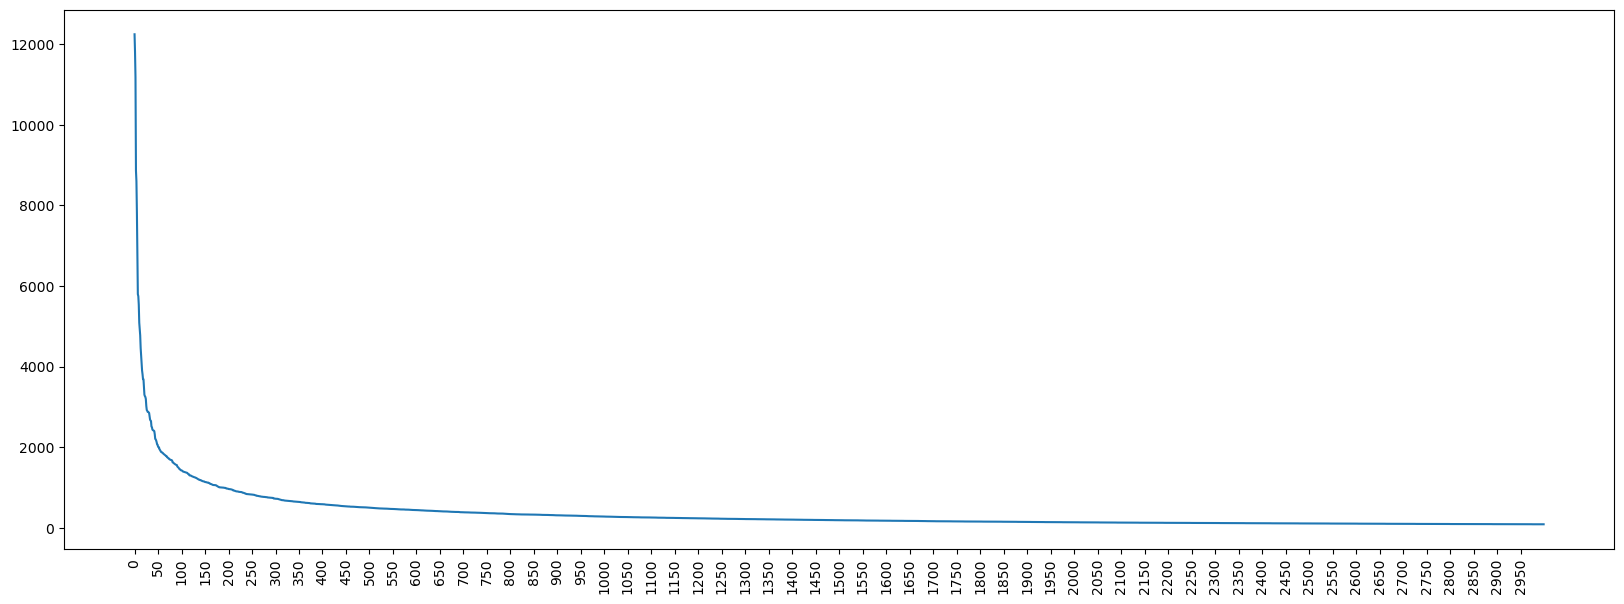

              precision    recall  f1-score   support

           0       0.68      0.67      0.68       114
           1       0.57      0.64      0.60       152
           2       0.73      0.75      0.74       139
           3       0.69      0.59      0.64       152
           4       0.60      0.73      0.66       138
           5       0.82      0.67      0.74       153
           6       0.69      0.81      0.74       147
           7       0.68      0.77      0.72       137
           8       0.63      0.83      0.71       131
           9       0.73      0.87      0.79       135
          10       0.93      0.79      0.85       136
          11       0.93      0.87      0.90       145
          12       0.64      0.60      0.62       157
          13       0.83      0.86      0.85       151
          14       0.86      0.80      0.83       155
          15       0.84      0.77      0.80       159
          16       0.82      0.82      0.82       140
          17       0.88    

In [6]:
#for top 1500 values
x=make_data_to_table_dictionary(data.data,1500)
y=data.target
#using inbuilt MultinomialNB
clf=MultinomialNB()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=1)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
a_1=accuracy_score(y_test,y_pred)*100
print(a_1)

Receiving a acuuray of 81.01% with 3000 top values

Receiving a acuuray of 77.30% with 2000 top values

Receiving a acuuray of 74.47% with 1500 top values

In [7]:
def fit(x_train,y_train):
    result={}
    x_train=np.array(x_train)
    y_train=np.array(y_train)
    class_value=set(y_train)
    for current_class in class_value:
        result['total_data']=len(y_train)
        current_class_row=(y_train==current_class)
        x_train_current=x_train[current_class_row]
        y_train_current=y_train[current_class_row]
        num_features=x_train.shape[1]
        result[current_class]={}
        result[current_class]['total_count']=len(y_train_current)
        result[current_class]['total_words']=x_train_current.sum()
        for j in range(1,1+num_features):
            result[current_class][j]=x_train_current[:,j-1].sum()
    return result

In [8]:
def probability(dictionary,x,current_class):
    output=np.log(dictionary[current_class]['total_count'])-np.log(dictionary['total_data'])
    num_feature=len(dictionary[current_class].keys())
    for j in range(1,num_feature-1):
        if x[j-1]!=0:
            current_probability=np.log(dictionary[current_class][j]+1)-np.log(dictionary[current_class]['total_words']+len(x))
            output=output+current_probability
    return output

In [9]:
def predictSinglePoint(dictionary,x):
    classes=dictionary.keys()
    best_p=-1000
    best_class=-1
    first_run=True
    #selectig high probability class
    for current_class in classes:
        if current_class=='total_data':
            continue
        p_current_class=probability(dictionary,x,current_class)
        if (first_run or p_current_class>best_p):
            best_p=p_current_class
            best_class=current_class
        first_run=False
    return best_class

In [10]:
def predict(x_test,dictionary):
    y_pred=[]
    #calculating every record probability seperatly
    for x in x_test:
        x_class=predictSinglePoint(dictionary,x)
        y_pred.append(x_class)
    return y_pred

In [11]:
dictionary=fit(x_train,y_train)

In [12]:
y_pred_2=predict(x_test,dictionary)

In [13]:
print(classification_report(y_test,y_pred_2))
print(confusion_matrix(y_test,y_pred_2))
a_2=accuracy_score(y_test,y_pred_2)*100
print(a_2)

              precision    recall  f1-score   support

           0       0.70      0.73      0.72       114
           1       0.55      0.64      0.59       152
           2       0.77      0.68      0.72       139
           3       0.69      0.64      0.66       152
           4       0.58      0.72      0.64       138
           5       0.81      0.66      0.73       153
           6       0.68      0.82      0.74       147
           7       0.67      0.77      0.72       137
           8       0.56      0.85      0.68       131
           9       0.72      0.87      0.79       135
          10       0.95      0.78      0.85       136
          11       0.93      0.88      0.91       145
          12       0.68      0.62      0.65       157
          13       0.80      0.84      0.82       151
          14       0.87      0.77      0.82       155
          15       0.90      0.74      0.81       159
          16       0.81      0.81      0.81       140
          17       0.92    

Receiving a acuuray of 80.45% with 3000 top values

Receiving a acuuray of 76.95% with 2000 top values

Receiving a acuuray of 74.19% with 1500 top values

In [16]:
#comparison 
(a_1-a_2)

0.2827854365500144